In [1]:
import pandas as pd
from scipy.stats import chi2_contingency

In [2]:
cleaned_data = pd.read_csv('cleaned_data.csv')
cleaned_data.head()

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### Chi-square statistics for EDA 

In [3]:
predictors = ['age', 'gender', 'family_history', 'leave', 'no_employees', 'mental_health_consequence', 'coworkers', 'seek_help']

for predictor in predictors:
    print(f"\n--- Chi-squared Test for '{predictor}' ---")
    if predictor == 'age': 
        cleaned_data['age_group'] = pd.cut(cleaned_data['age'], bins=[cleaned_data['age'].min()-1, 25, 35, 45, 55, cleaned_data['age'].max()], labels=['<25', '25-35', '35-45', '45-55', '>55'])
        contingency_table = pd.crosstab(cleaned_data['treatment'], cleaned_data['age_group'])
    else:
        contingency_table = pd.crosstab(cleaned_data['treatment'], cleaned_data[predictor])
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Display the contingency table
    print(f"Contingency Table for {predictor} vs. Treatment:\n{contingency_table}\n")
    print(f"Chi-squared value: {chi2:.4f}, P-value: {p:.4f}, Degrees of freedom: {dof}")
    
    if p < 0.05:
        print("Interpretation: Statistically significant association between the variables.")
    else:
        print("Interpretation: No statistically significant association between the variables.")


--- Chi-squared Test for 'age' ---
Contingency Table for age vs. Treatment:
age_group  <25  25-35  35-45  45-55  >55
treatment                               
No         112    360    124     18    5
Yes        105    341    153     24    9

Chi-squared value: 5.6424, P-value: 0.2275, Degrees of freedom: 4
Interpretation: No statistically significant association between the variables.

--- Chi-squared Test for 'gender' ---
Contingency Table for gender vs. Treatment:
gender     Female  Male  Other
treatment                     
No             77   538      4
Yes           170   448     14

Chi-squared value: 48.6569, P-value: 0.0000, Degrees of freedom: 2
Interpretation: Statistically significant association between the variables.

--- Chi-squared Test for 'family_history' ---
Contingency Table for family_history vs. Treatment:
family_history   No  Yes
treatment               
No              492  127
Yes             270  362

Chi-squared value: 175.9552, P-value: 0.0000, Degrees of fre

In [4]:
chi_squared_summary = pd.DataFrame({
    'Predictor': ['age', 'gender', 'family_history', 'leave', 'no_employees', 'mental_health_consequence', 'coworkers', 'seek_help'],
    'Chi-squared Value': [5.6424, 48.6569, 175.9552, 28.8799, 8.8188, 20.1207, 6.2157, 10.7134],
    'P-value': [0.2275, 0.0000, 0.0000, 0.0000, 0.1165, 0.0000, 0.0447, 0.0047],
    'Degrees of Freedom': [4, 2, 1, 4, 5, 2, 2, 2],
    'Interpretation': [
        'No significant association',
        'Statistically significant association',
        'Statistically significant association',
        'Statistically significant association',
        'No significant association',
        'Statistically significant association',
        'Statistically significant association',
        'Statistically significant association'
    ]
})

chi_squared_summary.index = range(1, len(chi_squared_summary) + 1)
chi_squared_summary

,Predictor,Chi-squared Value,P-value,Degrees of Freedom,Interpretation
1,age,5.6424,0.2275,4,No significant association
2,gender,48.6569,0.0000,2,Statistically significant association
3,family_history,175.9552,0.0000,1,Statistically significant association
4,leave,28.8799,0.0000,4,Statistically significant association
5,no_employees,8.8188,0.1165,5,No significant association
6,mental_health_consequence,20.1207,0.0000,2,Statistically significant association
7,coworkers,6.2157,0.0447,2,Statistically significant association
8,seek_help,10.7134,0.0047,2,Statistically significant association


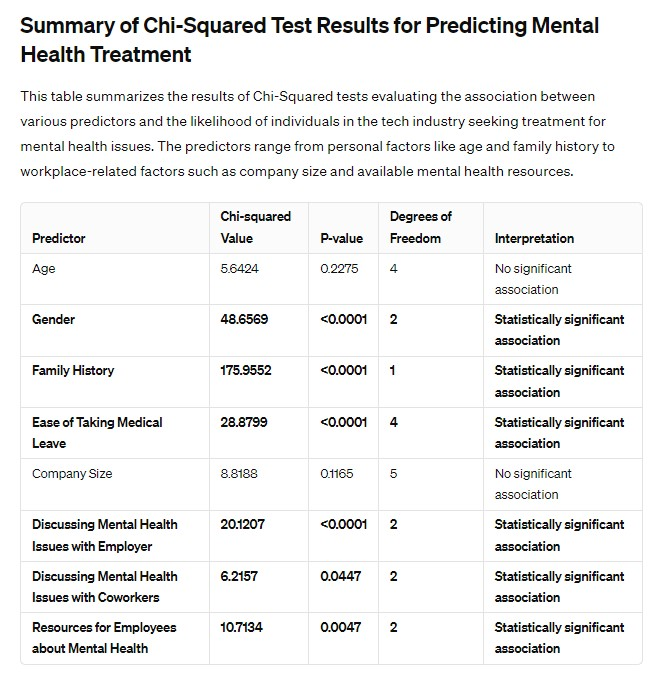